### Task Goal
The goal is to cluster the customers in optimal number of clusters - from a statistical point of view -
in such manner that these clusters are meaningful for next step business actions.

### Data Exploration

In [1]:
# import libraries necessary for data exploration

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in the dataset and set ID as index
dt = pd.read_csv('Masterfile.csv', index_col=0)

In [3]:
# check the first few details in the dataset
dt.head()

,IsPMIUser,IsPMCOMUser,IsRegisteredUser,RegisteredUserCreateDate,PmMaturityType,YearsInPM,IndustryType_IT,IndustryType_Other,IndustryType_Healthcare,IndustryType_N/A,...,PMCOMPracticeNewPractitioners,PMCOMPracticeTalentManagement,PMCOMPracticeITProjectManagement,PMCOMPracticeAerospaceAndDefense,PMCOMPracticePharmaceutical,PMCOMPracticeEnergy,PMCOMPracticeFinancialServices,PMCOMPracticeBenefitsRealization,PMCOMPracticeVirtualTeams,PMCOMPracticePMInAcademia
ID,,,,,,,,,,,,,,,,,,,,,
AABB1jkk1,0,1.0,1,233,0,NaN,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AABB1jkk2,0,1.0,0,0,0,NaN,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AABB1jkk3,1,1.0,1,176,0,NaN,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AABB1jkk4,0,1.0,0,0,0,NaN,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AABB1jkk5,0,1.0,0,0,0,NaN,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# check dataset dimension
dt.shape

(900, 614)

In [5]:
# dataset information
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, AABB1jkk1 to AABB1jkk900
Columns: 614 entries, IsPMIUser to PMCOMPracticePMInAcademia
dtypes: float64(334), int64(271), object(9)
memory usage: 4.2+ MB


In [6]:
# Checking sum of missing values in features of the dataset
dt.isnull().sum().sort_values(ascending=False)

PMI_PBA_PDUS_Current_Year3                   900
PfMP_PDUS_LastCycle_TYPE_InformalLearning    900
PMI_ACP_PDUS_LastCycle_TYPE_CreateContent    900
CertMaturityYears                            900
PMI_ACP_PDUS_LastCycle_TYPE_DigitalMedia     900
                                            ... 
PMI_PBA_ApplicationStatus_EligibleForExam      0
PMI_PBA_ApplicationStatus_EligibleToPay        0
PMI_PBA_ApplicationStatus_Pending              0
PMI_PBA_ApplicationStatus_Submitted            0
IsPMIUser                                      0
Length: 614, dtype: int64

In [7]:
# List of features with missing data 
null_features = dt.columns[dt.isnull().sum()>0]
print(null_features, "\n\n" "There are " + str(len(null_features)) + " features with missing data or nan values")

Index(['IsPMCOMUser', 'YearsInPM', 'LevelOfEducation',
       'PreferredStateProvince', 'PreferredRegion', 'IsFirstYearMember',
       'IsMember2PlusYears', 'MembershipConsecutiveYears', 'IsChapterLeader',
       'HomeChapter',
       ...
       'PMCOMPracticeNewPractitioners', 'PMCOMPracticeTalentManagement',
       'PMCOMPracticeITProjectManagement', 'PMCOMPracticeAerospaceAndDefense',
       'PMCOMPracticePharmaceutical', 'PMCOMPracticeEnergy',
       'PMCOMPracticeFinancialServices', 'PMCOMPracticeBenefitsRealization',
       'PMCOMPracticeVirtualTeams', 'PMCOMPracticePMInAcademia'],
      dtype='object', length=338) 

There are 338 features with missing data or nan values


In [8]:
# Features with >50% missing values from total observation

highnulfeat = dt.columns[dt.isnull().sum()> 0.50*dt.shape[0]]
print(highnulfeat, "\n\n" + str(len(highnulfeat)) + " features have more than 50% missing data or nan values")

Index(['YearsInPM', 'LevelOfEducation', 'HomeChapter', 'HomeChapterName',
       'PMP_Applications', 'PMP_Exams', 'PMP_ExamPassed', 'PMP_PDUS_Current',
       'PMP_PDUS_Current_Average', 'PMP_PDUS_Current_TYPE_Class',
       ...
       'PMCOMPracticeNewPractitioners', 'PMCOMPracticeTalentManagement',
       'PMCOMPracticeITProjectManagement', 'PMCOMPracticeAerospaceAndDefense',
       'PMCOMPracticePharmaceutical', 'PMCOMPracticeEnergy',
       'PMCOMPracticeFinancialServices', 'PMCOMPracticeBenefitsRealization',
       'PMCOMPracticeVirtualTeams', 'PMCOMPracticePMInAcademia'],
      dtype='object', length=326) 

326 features have more than 50% missing data or nan values


From the exploration done so far, the dataset contains 614 features and 900 observations, 9 of the features are categorical while the rest are numerical. The dataset also have 338 features with missing values. Of the 338 features, 326 have more than 50% of their total observation missing, these features are classified as 'highnulfeat'.

### Further Exploration into features with missing values

In [9]:
# first 10 features with 50% or more missing values
nan_cols = list(dt.columns[dt.isnull().sum()>0.50*dt.shape[0]])
nan_cols[:10]

['YearsInPM',
 'LevelOfEducation',
 'HomeChapter',
 'HomeChapterName',
 'PMP_Applications',
 'PMP_Exams',
 'PMP_ExamPassed',
 'PMP_PDUS_Current',
 'PMP_PDUS_Current_Average',
 'PMP_PDUS_Current_TYPE_Class']

In [10]:
# count of missing values in the first 10 with 50% or more
list_nan = list(dt.isnull().sum())
list_nan = [list_nan[i] for i in range(len(list_nan)) if list_nan[i]>0.50*dt.shape[0]]
list_nan[:10]

[865, 542, 454, 482, 481, 481, 846, 900, 900, 900]

C:\Users\HP\Anaconda3\envs\nas_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Some Features with Missing Value Count > 50% of total observation'}>

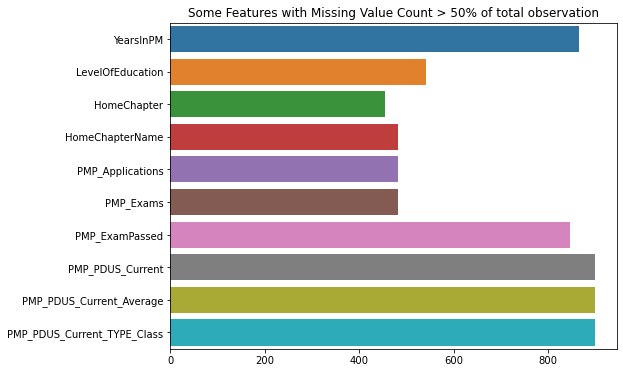

In [11]:
# A plot of the first 10 features with 50% or more missing values
plt.figure(figsize=(8,6))
plt.title('Some Features with Missing Value Count > 50% of total observation')
sns.barplot(list_nan[:10],nan_cols[:10])

A further analysis into features with missing values gave us more insight into those features and how many observations they have missing. The above barplot gives more pictorial details as some of these features have 100% of their observations missing.

### Handling Missing values in the dataset

In this section, the features with missing values were handled using 3 steps:

1. I dropped features (numerical and categorical) having more than 50% missing values as they would contribute nothing to this analysis.
2. The other categorical features are handled by specifing 'Others' for Missing values. The idea is to preserve information and see how they are distributed in the cluster. 
3. The numerical features have their missing values filled with the mean of the specific fields.

#####  *Note*: Steps 2 and 3 are being carried out on the 12 features having missing values <= 50% depending on their dtype

#### 1. Dropping features with very high missing values

In [12]:
# drop features with missing values greater than 50% of total observations 
data= dt.drop(dt[highnulfeat], axis=1)

In [13]:
# dimension of the dataset after dropping features with high missing values
data.shape

(900, 288)

#### 2. Categorical features preprocessing

Here some mappings are done which includes representing nan values as others

In [14]:
# Selecting the categorical variables from the dataset

object_columns = [column for column in data.columns if data[column].dtype == 'object']
object_columns

['PreferredStateProvince',
 'PreferredCountry',
 'PreferredRegion',
 'IsCAPMCertified']

In [15]:
# Categorical features before preprocessing
data[object_columns].head()

,PreferredStateProvince,PreferredCountry,PreferredRegion,IsCAPMCertified
ID,,,,
AABB1jkk1,FL,USA,NaN,NaN
AABB1jkk2,AZ,USA,NaN,NaN
AABB1jkk3,XX,0,NaN,NO
AABB1jkk4,OH,USA,NaN,NaN
AABB1jkk5,CO,USA,NaN,NaN


#### State Province

['FL' 'AZ' 'XX' 'OH' 'CO' 'CA' 'IL' 'VT' 'TX' 'MN' 'NC' 'TN' 'MD' '0' 'GA'
 'KY' 'NE' 'CT' 'WA' 'NJ' 'MA' 'KS' 'NY' 'VA' 'WI' 'IN' 'MI' 'ID' 'UT'
 'DC' 'NM' 'SC' 'PA' nan 'MO' 'OR' 'AL' 'OK' 'ME' 'AE' 'AK' 'IA' 'SD' 'NV'
 'NH' 'MT' 'tamil Nadu' 'LA' 'AR' 'HI' 'ND' 'DE']



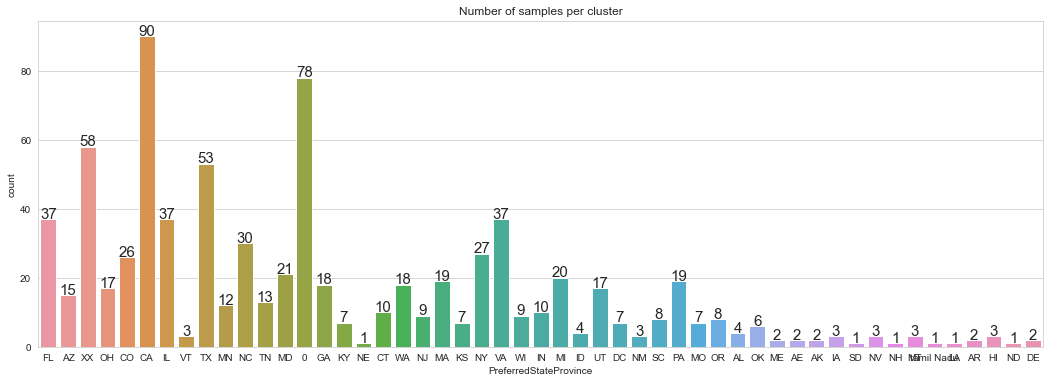

In [16]:
print(data['PreferredStateProvince'].unique())
print('')
# print(data['PreferredStateProvince'].value_counts())

sns.set_style("whitegrid")
plt.figure(figsize=(18,6))

plt.title('Number of samples per cluster')
plots = sns.countplot(x='PreferredStateProvince', data=data)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),  
                       (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                       size=15, xytext=(0, 5), 
                       textcoords='offset points')

#### Preferred Country

In [17]:
# check the unique contries in the dataset and their count
print(data['PreferredCountry'].unique())
print('')
print(data['PreferredCountry'].value_counts())

['USA' '0' 'UNITED STATES' 'INDIA']

UNITED STATES    565
USA              282
0                 52
INDIA              1
Name: PreferredCountry, dtype: int64


In [18]:
# Mapping USA and UNITED STATES as similar entity and specifying 0 as others
country = {'UNITED STATES':'USA','USA':'USA','0':'Others','INDIA':'INDIA'}
data['PreferredCountry'] = data['PreferredCountry'].map(country)

['USA' 'Others' 'INDIA']

USA       847
Others     52
INDIA       1
Name: PreferredCountry, dtype: int64


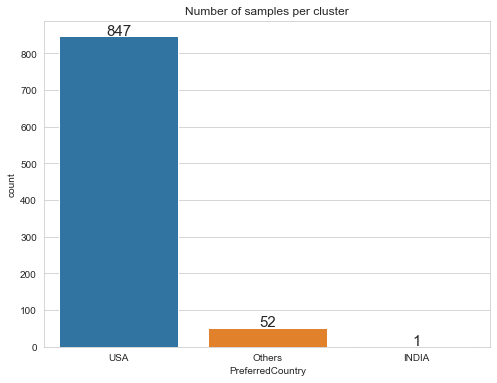

In [19]:
# Preferred country after preprocessing 
print(data['PreferredCountry'].unique())
print('')
print(data['PreferredCountry'].value_counts())

sns.set_style("whitegrid")
plt.figure(figsize=(8,6))

plt.title('Number of samples per cluster')
plots = sns.countplot(x='PreferredCountry', data=data)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),  
                       (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                       size=15, xytext=(0, 5), 
                       textcoords='offset points')

####  Preferred Region 

In [20]:
# check the unique region in the dataset and their count
print(data['PreferredRegion'].unique())
print('')
print(data['PreferredRegion'].value_counts())

[nan 'Northern America' 'Asia-Pacific']

Northern America    565
Asia-Pacific          1
Name: PreferredRegion, dtype: int64


checking unique regions above we see that nan was not accounted for as no value was given initially. Since the aim of this task is to observe customers behaviors, I will map nan values to 'Others' in order to view customers in the cluster that chose not to give a value.

In [21]:
# We map nan to others
region = {'Northern America':'Northern America','Asia-Pacific':'Asia-Pacific',np.nan:'Others'}
data['PreferredRegion'] = data['PreferredRegion'].map(region)

['Others' 'Northern America' 'Asia-Pacific']

Northern America    565
Others              334
Asia-Pacific          1
Name: PreferredRegion, dtype: int64


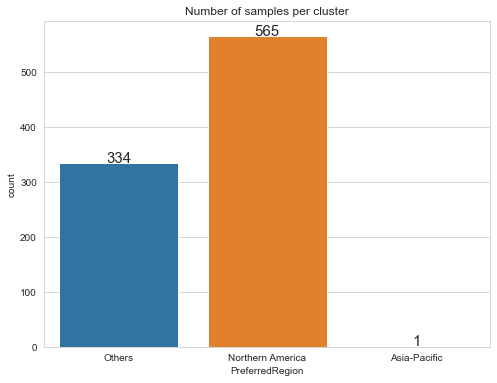

In [22]:
# A new value count shows the figure which will be interesting to see in the cluster
print(data['PreferredRegion'].unique())
print('')
print(data['PreferredRegion'].value_counts())

sns.set_style("whitegrid")
plt.figure(figsize=(8,6))

plt.title('Number of samples per cluster')
plots = sns.countplot(x='PreferredRegion', data=data)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),  
                       (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                       size=15, xytext=(0, 5), 
                       textcoords='offset points')

#### CAPM Certified

In [23]:
# As in preffered region above, we handle nan in the same way
print(data['IsCAPMCertified'].unique())
print('')
print(data['IsCAPMCertified'].value_counts())

[nan 'NO ']

NO     584
Name: IsCAPMCertified, dtype: int64


In [24]:
# We map nan to others
capmcertified = {np.nan:'Others', 'NO ':'NO'}
data['IsCAPMCertified']=data['IsCAPMCertified'].map(capmcertified)

['Others' 'NO']

NO        584
Others    316
Name: IsCAPMCertified, dtype: int64



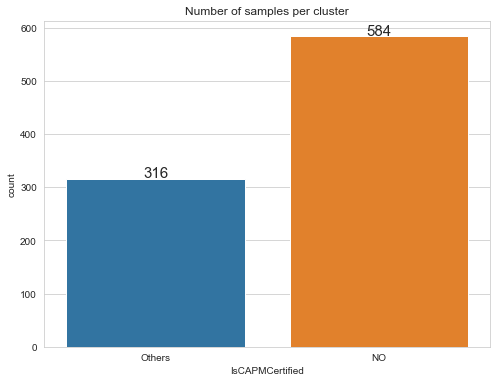

In [25]:
# we count to see the value
print(data['IsCAPMCertified'].unique())
print('')
print(data['IsCAPMCertified'].value_counts())
print('')
# sns.countplot(data['IsCAPMCertified'])

sns.set_style("whitegrid")
plt.figure(figsize=(8,6))

plt.title('Number of samples per cluster')
plots = sns.countplot(x='IsCAPMCertified', data=data)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),  
                       (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                       size=15, xytext=(0, 5), 
                       textcoords='offset points')

Mapping nan to others in the steps above would ensure we are able to view the distribution of customers not giving values to these fields.

### Data Splitting

The data is being split into categorical and numerical. The numerical features will be used for the clustering task, while the categorical features will be used to assess customers behaviors across clusters.

In [26]:
# Splitting the dataset based on dtype
numerical_data = data.drop(object_columns, axis=1)
categorical_data = data[object_columns]

In [27]:
# The new dimension of our dataset
print(numerical_data.shape)
print(categorical_data.shape)

(900, 284)
(900, 4)


#### 3. Numerical features preprocessing

In [28]:
# fill all NaN values in numerical data with mean of the specific field
numerical_data.fillna(numerical_data.mean(), inplace=True)

In [29]:
# categorical features after preprocessing
numerical_data.head()

,IsPMIUser,IsPMCOMUser,IsRegisteredUser,RegisteredUserCreateDate,PmMaturityType,IndustryType_IT,IndustryType_Other,IndustryType_Healthcare,IndustryType_N/A,IndustryType_Government,...,"PMCOMUserJobFunction_SeniorBusiness_ITMgmt_(VP,Director,etc.)",PMCOMUserLastUpdate,PMCOMUserShowProfile_Everyone,PMCOMUserShowProfile_OnlyPMCOMMembers,PMCOMUserShowProfile_OnlyUserNetworkMembers,PMCOMUserShowProfile_TemporarilyHidden,PMCOMUserAllowContact_DoNotAllowContactFromPMCOMUsers,PMCOMUserAllowContact_OnlyPMCOMMembers,PMCOMUserAllowContact_OnlyUserNetworkMembers,PMCOMUserProfileCreateDate
ID,,,,,,,,,,,,,,,,,,,,,
AABB1jkk1,0,1.0,1,233,0,0,0,0,0,0,...,0,16.6,0,1,0,0,0,1,0,7.7
AABB1jkk2,0,1.0,0,0,0,0,0,0,0,0,...,0,44.2,0,0,0,0,1,0,0,0.0
AABB1jkk3,1,1.0,1,176,0,0,1,0,0,0,...,0,3.8,0,1,0,0,0,1,0,5.8
AABB1jkk4,0,1.0,0,0,0,0,0,0,0,0,...,0,94.7,0,0,0,0,1,0,0,0.0
AABB1jkk5,0,1.0,0,0,0,0,0,0,0,0,...,0,9.3,0,0,0,0,1,0,0,0.0


In [30]:
# categorical features after preprocessing
categorical_data.head()

,PreferredStateProvince,PreferredCountry,PreferredRegion,IsCAPMCertified
ID,,,,
AABB1jkk1,FL,USA,Others,Others
AABB1jkk2,AZ,USA,Others,Others
AABB1jkk3,XX,Others,Others,NO
AABB1jkk4,OH,USA,Others,Others
AABB1jkk5,CO,USA,Others,Others


### Preparing the numerical data for clustering

In [31]:
# import necessary libraries 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [32]:
# dataset scaled to prevent bias in features with large values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [33]:
scaled_data

array([[-1.49969913,  1.02832682,  0.72129763, ...,  3.20156212,
        -0.08192319,  0.25027224],
       [-1.49969913,  1.02832682, -1.38639025, ..., -0.31234752,
        -0.08192319, -0.2086209 ],
       [ 0.66680041,  1.02832682,  0.72129763, ...,  3.20156212,
        -0.08192319,  0.13703887],
       ...,
       [-1.49969913,  1.02832682, -1.38639025, ..., -0.31234752,
        -0.08192319, -0.2086209 ],
       [-1.49969913,  1.02832682,  0.72129763, ...,  3.20156212,
        -0.08192319,  6.15032686],
       [-1.49969913,  1.02832682,  0.72129763, ..., -0.31234752,
        -0.08192319,  6.19204442]])

In [34]:
# reduce dimension using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_data)
reduced

array([[ 4.90035756,  0.24826311],
       [ 5.43451304, -0.1649728 ],
       [-1.14775799, 24.23968561],
       ...,
       [ 6.09466938, -0.10026189],
       [ 5.21165857,  0.31603653],
       [ 6.01363302, -0.69562023]])

##### Why PCA was used as the final dimensionality reduction technique

PCA is a dimensionality reduction algorithm. It takes in the dataset and returns features or number of components that has been specified. PCA works checking correlation between features, assessing variance and returning features having relevant information about the datasets as components. The first component have the most information, followed by the next depending on the number of component specified.

In this task, I have chosen n_components as 2. Since PCA will return features of the dataset as components having the most information about the dataset, it would be easier to use these components in **2D visualization** and show clusters off of them based on the number of K or centroids.

### Determining K value using the elbow method

The **Elbow method** of selecting number of clusters works on the principle of distance between points and sum of squared errors (SSE). While it is okay to pick centroids randomly, SSE is being calculated on each points, depending on the number of centroids. Centroids adjusts their positions as they increase in the dataset till an optimum K value is reached where the sample points would not change clusters. Most times, this K value is just around the curve (elbow) of SSE vs K plot. 

In [35]:
# Determining K value for K means

# We select varying values of K and calculate SSE from them
k_range = range(1,11)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    # fit in the pca reduced data
    km.fit(reduced)
    # The inertia attribute of the KMeans class helps in calculating SSE for each value of K
    sse.append(km.inertia_)

In [36]:
# List of SSE from each K from 1 to 10
sse

[16435.730375817664,
 5269.372847943357,
 2822.8519153294487,
 1888.9683374787792,
 1264.440306508202,
 1055.1446818115774,
 881.5377969998,
 716.2456597126215,
 630.5225720064399,
 547.0509566101459]

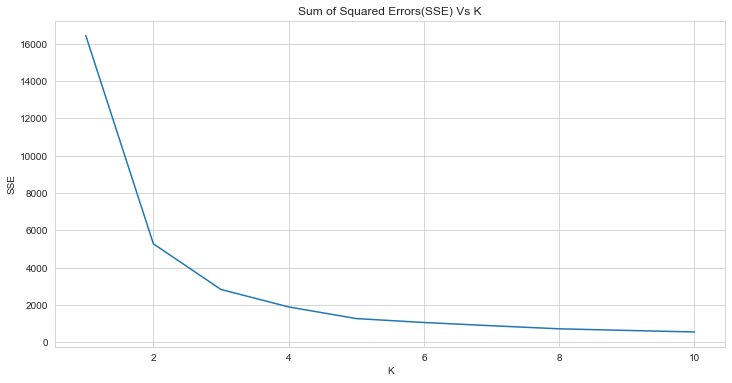

In [37]:
# The Elbow Plot

plt.figure(figsize=(12,6))

plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Sum of Squared Errors(SSE) Vs K')
plt.plot(k_range, sse)

A further analysis picking values of K around the elbow would give more insight to this technique and why a suitable K will be chosen.

### K Means

In [38]:
# using 3 clusters

km3 = KMeans(n_clusters=3)
km3.fit(reduced)

KMeans(n_clusters=3)

In [39]:
# print(km3.labels_)

In [40]:
final_data = pd.DataFrame(data=reduced, columns=['PC1', 'PC2'], index=numerical_data.index)
final_data.head()

,PC1,PC2
ID,,
AABB1jkk1,4.900358,0.248263
AABB1jkk2,5.434513,-0.164973
AABB1jkk3,-1.147758,24.239686
AABB1jkk4,6.387489,-0.182008
AABB1jkk5,5.031537,0.893090


In [41]:
# Depending on the number of clusters, KMeans tend to predict and label samples based on their clusters
# KMeans.labels_ reveals these labels
final_data['pred_w_3_clusters'] = km3.labels_

In [42]:
final_data.head()

,PC1,PC2,pred_w_3_clusters
ID,,,
AABB1jkk1,4.900358,0.248263,1
AABB1jkk2,5.434513,-0.164973,1
AABB1jkk3,-1.147758,24.239686,2
AABB1jkk4,6.387489,-0.182008,1
AABB1jkk5,5.031537,0.893090,1


In [43]:
# Kmeans.cluster_centers_ gives position of the centroid in their respective clusters
km3.cluster_centers_

array([[-2.46159249, -0.42298034],
       [ 5.08061595, -0.07114244],
       [-2.02464667,  8.84187426]])

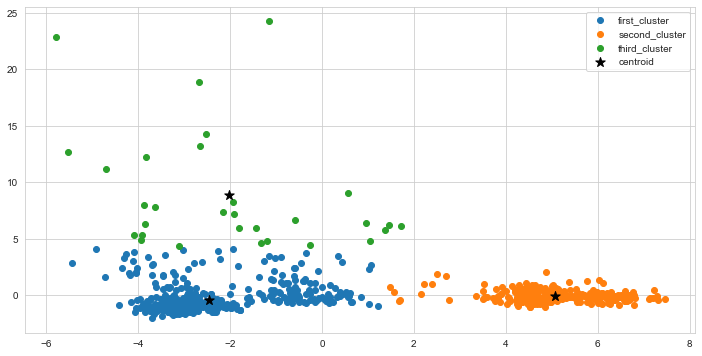

In [44]:
data1 = final_data[final_data.pred_w_3_clusters==0]
data2 = final_data[final_data.pred_w_3_clusters==1]
data3 = final_data[final_data.pred_w_3_clusters==2]

plt.figure(figsize=(12,6))

plt.scatter(data1.PC1, data1.PC2, label='first_cluster')
plt.scatter(data2.PC1, data2.PC2, label='second_cluster')
plt.scatter(data3.PC1, data3.PC2, label='third_cluster')

plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1], color='black', marker='*',s=100,label='centroid')

plt.legend()

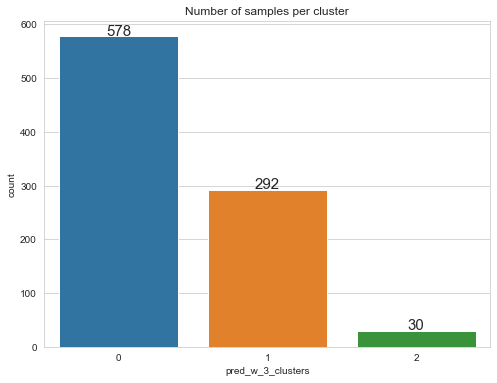

In [45]:
# Number of samples per cluster
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))

plt.title('Number of samples per cluster')
plots = sns.countplot(x='pred_w_3_clusters', data=final_data)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),  
                       (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                       size=15, xytext=(0, 5), 
                       textcoords='offset points')

In [46]:
## Using 4 clusters 

km4 = KMeans(n_clusters=4)
km4.fit(reduced)

KMeans(n_clusters=4)

In [47]:
final_data['pred_w_4_clusters'] = km4.labels_

In [48]:
km4.cluster_centers_

array([[-2.07111144,  3.82047465],
       [ 5.08061595, -0.07114244],
       [-2.47040858, -0.70136803],
       [-3.60577637, 16.1984082 ]])

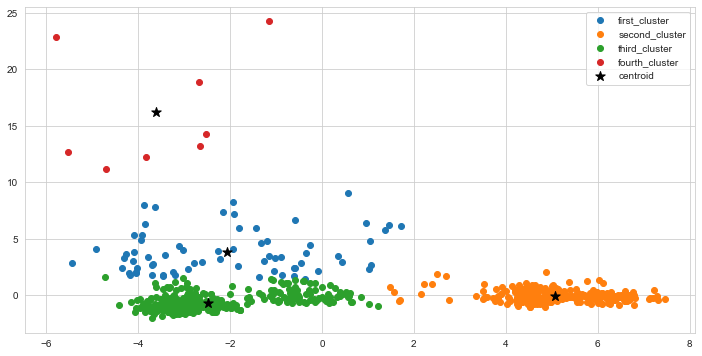

In [49]:
data1 = final_data[final_data.pred_w_4_clusters==0]
data2 = final_data[final_data.pred_w_4_clusters==1]
data3 = final_data[final_data.pred_w_4_clusters==2]
data4 = final_data[final_data.pred_w_4_clusters==3]



plt.figure(figsize=(12,6))

plt.scatter(data1.PC1, data1.PC2, label='first_cluster')
plt.scatter(data2.PC1, data2.PC2, label='second_cluster')
plt.scatter(data3.PC1, data3.PC2, label='third_cluster')
plt.scatter(data4.PC1, data4.PC2, label='fourth_cluster')


plt.scatter(km4.cluster_centers_[:,0],km4.cluster_centers_[:,1], color='black', marker='*',s=100, label='centroid',)

plt.legend()

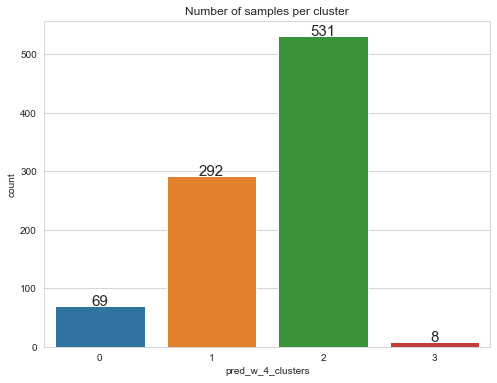

In [50]:
# Number of samples per cluster
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))

plt.title('Number of samples per cluster')
plots = sns.countplot(x='pred_w_4_clusters', data=final_data)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),  
                       (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                       size=15, xytext=(0, 5), 
                       textcoords='offset points')

In [51]:
## Using 5 clusters 

km5 = KMeans(n_clusters=5)
km5.fit(reduced)

KMeans(n_clusters=5)

In [52]:
# print(km5.labels_)

In [53]:
final_data['pred_w_5_clusters'] = km5.labels_

In [54]:
km5.cluster_centers_

array([[-2.91995193, -0.81651331],
       [ 5.16845507, -0.08768282],
       [-2.22880443,  4.45456275],
       [-3.60577637, 16.1984082 ],
       [-0.20745442,  0.29096298]])

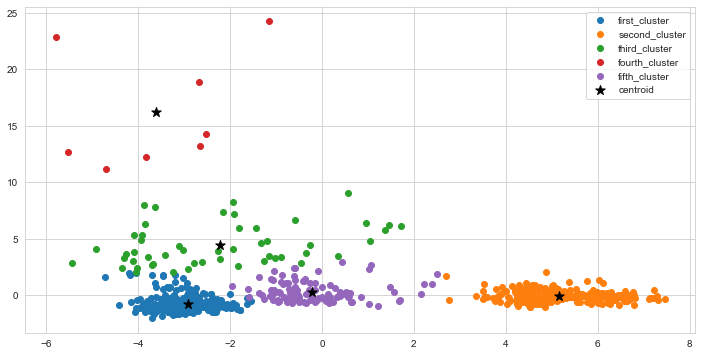

In [55]:
data1 = final_data[final_data.pred_w_5_clusters==0]
data2 = final_data[final_data.pred_w_5_clusters==1]
data3 = final_data[final_data.pred_w_5_clusters==2]
data4 = final_data[final_data.pred_w_5_clusters==3]
data5 = final_data[final_data.pred_w_5_clusters==4]


plt.figure(figsize=(12,6))

plt.scatter(data1.PC1, data1.PC2, label='first_cluster')
plt.scatter(data2.PC1, data2.PC2, label='second_cluster')
plt.scatter(data3.PC1, data3.PC2, label='third_cluster')
plt.scatter(data4.PC1, data4.PC2, label='fourth_cluster')
plt.scatter(data5.PC1, data5.PC2, label='fifth_cluster')

plt.scatter(km5.cluster_centers_[:,0],km5.cluster_centers_[:,1], color='black', marker='*',s=100, label='centroid',)

plt.legend()

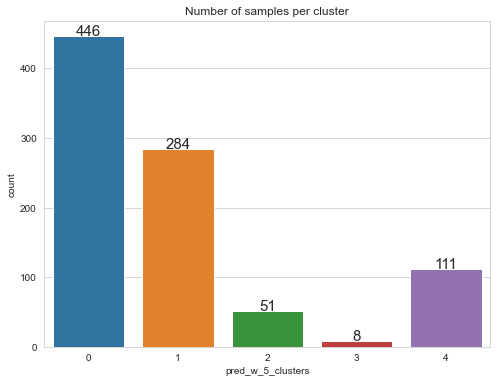

In [56]:
# Number of samples per cluster
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))

plt.title('Number of samples per cluster')
plots = sns.countplot(x='pred_w_5_clusters', data=final_data)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),  
                       (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                       size=15, xytext=(0, 5), 
                       textcoords='offset points')

### Analyzing Customer's Behaviour Across Clusters

In [57]:
# Merging the categorical features back with our final dataset

final_data['PreferredStateProvince']=categorical_data['PreferredStateProvince']
final_data['PreferredCountry']=categorical_data['PreferredCountry']
final_data['PreferredRegion']=categorical_data['PreferredRegion']
final_data['IsCAPMCertified']=categorical_data['IsCAPMCertified']

In [58]:
final_data.head()

,PC1,PC2,pred_w_3_clusters,pred_w_4_clusters,pred_w_5_clusters,PreferredStateProvince,PreferredCountry,PreferredRegion,IsCAPMCertified
ID,,,,,,,,,
AABB1jkk1,4.900358,0.248263,1,1,1,FL,USA,Others,Others
AABB1jkk2,5.434513,-0.164973,1,1,1,AZ,USA,Others,Others
AABB1jkk3,-1.147758,24.239686,2,3,3,XX,Others,Others,NO
AABB1jkk4,6.387489,-0.182008,1,1,1,OH,USA,Others,Others
AABB1jkk5,5.031537,0.893090,1,1,1,CO,USA,Others,Others


In [59]:
# This function shows distribution of customers based on the categorical variables
def customers_behavior(categorical_variable):
    plt.figure(figsize=(12,6))
    sns.scatterplot(x ='PC1', y='PC2', data = final_data, hue = categorical_variable)
    plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1], color='black', marker='*',s=100, label='centroid')

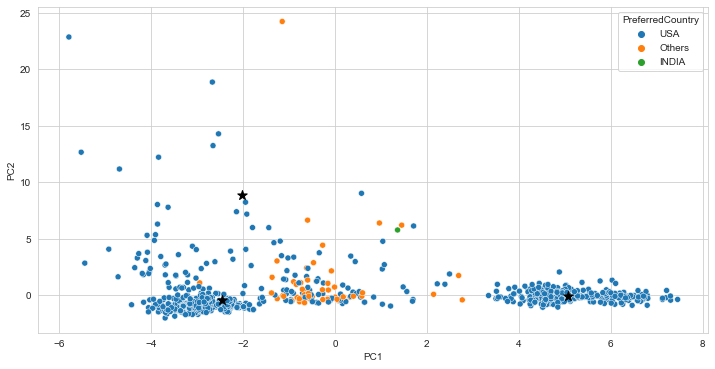

In [60]:
# Customers distribution based on preferred country
customers_behavior('PreferredCountry')

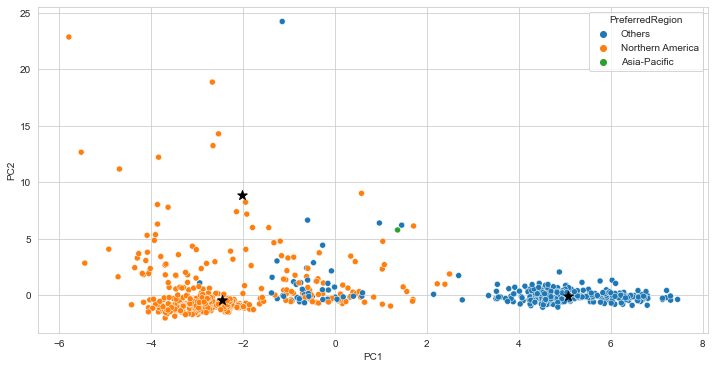

In [61]:
# Customers distribution based on preferred region
customers_behavior('PreferredRegion')

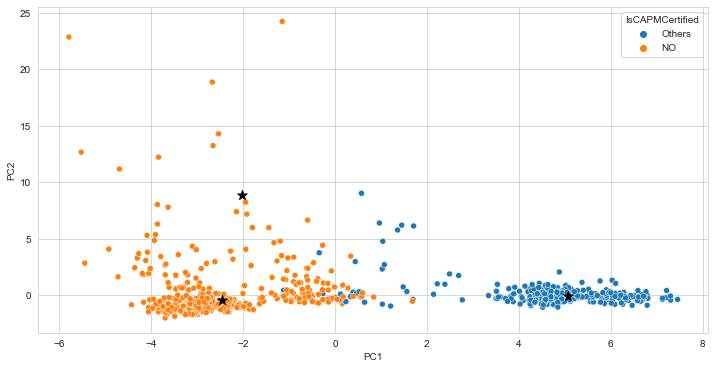

In [62]:
# Customers distribution based on preferred region
customers_behavior('IsCAPMCertified')

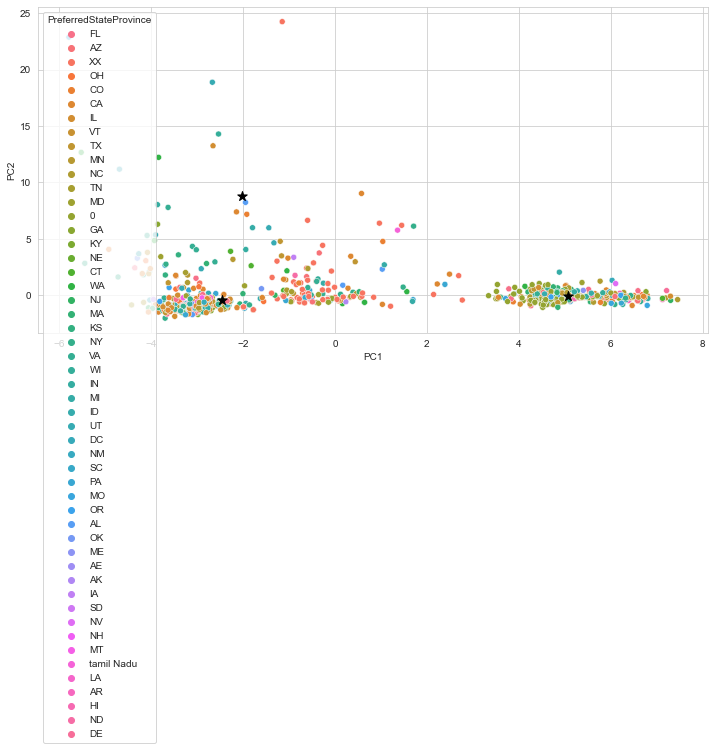

In [63]:
# Customers distribution based on preferred state province
customers_behavior('PreferredStateProvince')

### Results and Findings

The primary objective of this task was to create optimal clusters from the given dataset which would be relevant to the next line of business action. This objective was met, **3 clusters** were created and opted for. Though a further analysis into more clusters was assessed but it seems unnecessary and will only add noise to the analysis. 

**Selecting 3 clusters came from 2 keen statiscal analysis and decision which are as follows:**

- Calculating sum of squared errors from centroids and selecting the best K or centroid relevant for this analysis (The Elbow Method).

- The number of samples represented in the 3 clusters created. Analysis shows opting for more clusters would result in having clusters with very few samples lesser than 30. This would affect any business decision as 8 is too few a sample to rely on.

Statiscally, clusters should have samples evenly distributed enough and representing the population. While the third cluster when K=3 has a fewer sample 30, in case of a "two-stage" cluster sampling it might become relevant. A "two-stage" cluster sampling occurs if a simple random subsample of elements is selected within each of these groups or clusters.

In general, the second cluster contains 292 unresponsive customers. They barely answer questions or give out information. 

**Advice to stakeholders**

- Do not waste money and time shooting ads to cluster 2 as we can't say for a certain what their need is. Focus more on clusters 1 and 3. 


- Cluster 3 have customers that are responsive to surveys or questions, they are very similar to cluster 1. Though the sample size is small. If management is thinking of opening a new branch, they can open one close to cluster 3. 


- While cluster 2 customers are not responsive in this survey excercise, a strategic team can be set up to verify what would interest this set of customers. Maybe management can start thinking of new business ideas. We can't have 292 customers and not know how to please them. 


- Cluster 1 has majority of our customer base 578, do we have enough staff to service them? Is there a way we can service them better? Management should ensure we keep these customers away from any potential competitors by provding incentives to these customers.


- 584 customers answered NO to not being CAPM certified, all of which came from cluster 1 and 3. If management is thinking of providing professional trainings and certifications, these set of customers might be interested. 316 did not provide any answer, all customers from cluster 2 did not provide an answer. Maybe they don't know about project management and it's importance. Set up a team to orientate them.


In [64]:
# ID of customers in the first cluster
Customers_ID_1 =[]
# ID of customers in the second cluster
Customers_ID_2 =[]
# ID of customers in the third cluster
Customers_ID_3 =[]

Cluster_1_customers = list(final_data[(final_data.pred_w_3_clusters == 0)]['pred_w_3_clusters'].index)
Customers_ID_1.append(Cluster_1_customers)

Cluster_2_customers = list(final_data[(final_data.pred_w_3_clusters == 1)]['pred_w_3_clusters'].index)
Customers_ID_2.append(Cluster_2_customers)

Cluster_3_customers = list(final_data[(final_data.pred_w_3_clusters ==2)]['pred_w_3_clusters'].index)
Customers_ID_3.append(Cluster_3_customers)

In [65]:
# ID of customers in the first cluster
# print(Customers_ID_1)

In [66]:
# ID of customers in the second cluster
# print(Customers_ID_2)

In [67]:
# ID of customers in the third cluster
# print(Customers_ID_3)